<a href="https://colab.research.google.com/github/k571004/0614/blob/main/Time_Series/3_AAA_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.3


In [8]:
import pandas as pd
df=pd.read_excel('AAA.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(53567, 1)
                      Value
TS                         
2019-03-01 00:15:00  135.12
2019-03-01 00:30:00  131.28
2019-03-01 00:45:00  129.60
2019-03-01 01:00:00  126.48
2019-03-01 01:15:00  123.36


In [9]:
df_day=df.resample(rule='1H').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [10]:
df_day=df.resample(rule='D').sum()

In [11]:
df_day=df_day.reset_index()
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [12]:
from prophet import Prophet
from pandas import to_datetime

In [13]:
df_day.columns = ['ds', 'y']
df_day['ds']= to_datetime(df_day['ds'])

In [14]:
m = Prophet()
m.fit(df_day)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy1oq4p1/xlw72ttn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjy1oq4p1/5c_5icrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13864', 'data', 'file=/tmp/tmpjy1oq4p1/xlw72ttn.json', 'init=/tmp/tmpjy1oq4p1/5c_5icrx.json', 'output', 'file=/tmp/tmpjy1oq4p1/prophet_modelg272hvq2/prophet_model-20230616020418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
583,2020-10-04
584,2020-10-05
585,2020-10-06
586,2020-10-07
587,2020-10-08


In [22]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
583,2020-10-04,26011.330463,23639.447457,28645.194257
584,2020-10-05,26424.936076,24180.066570,28786.649988
585,2020-10-06,26508.097917,23826.757208,28929.162355
586,2020-10-07,26628.413829,24247.119311,29149.852623
587,2020-10-08,26625.423681,24136.217975,28997.268118


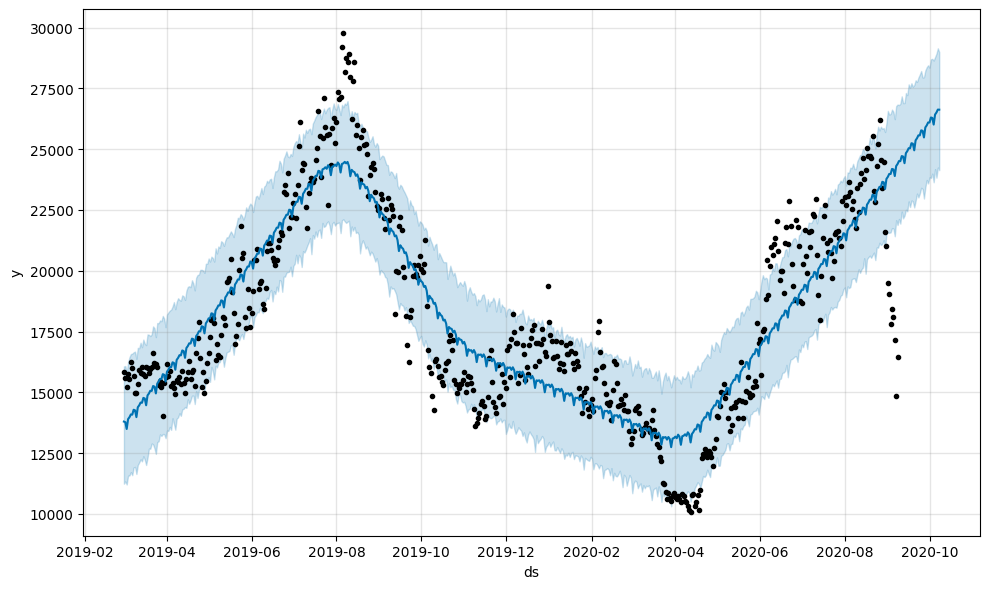

In [23]:
fig1 = m.plot(forecast)

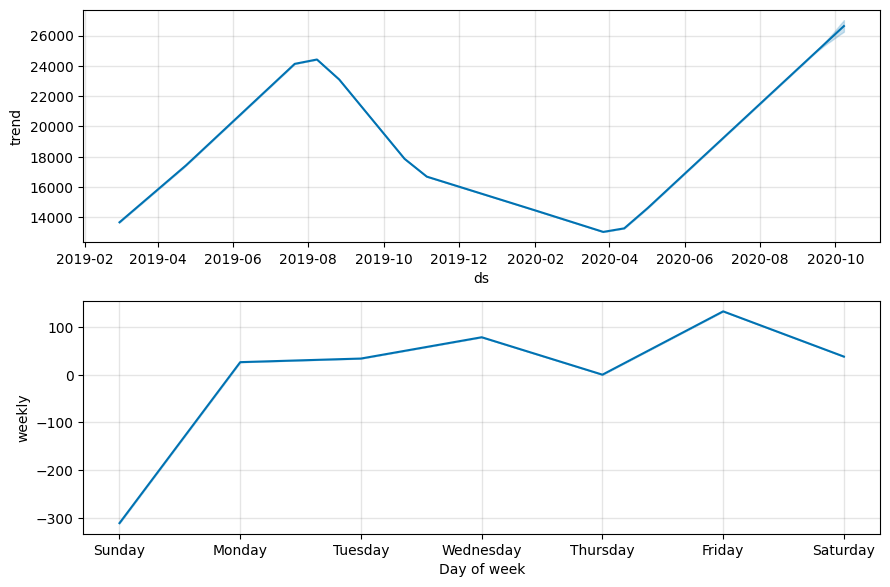

In [24]:
fig2 = m.plot_components(forecast)

In [19]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [20]:
plot_components_plotly(m, forecast)